In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [24]:
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.fashion_mnist.load_data()
print("xTrain shape: ", xTrain.shape, "yTrain shape: ", yTrain.shape)


xTrain shape:  (60000, 28, 28) yTrain shape:  (60000,)


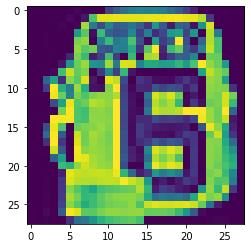

In [25]:
plt.imshow(xTrain[6000])

In [26]:
#normalize data
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255


In [27]:
#Split into training and validation sets
(xTrain, xValid) = xTrain[5000:], xTrain[:5000]
(yTrain, yValid) = yTrain[5000:], yTrain[:5000]


In [28]:
#Reshape the input from (28, 28) to (28, 28, 1)
w, h = 28, 28
xTrain = xTrain.reshape(xTrain.shape[0], w, h, 1)
print(xTrain.shape)
xValid = xValid.reshape(xValid.shape[0], w, h, 1)
xTest = xTest.reshape(xTest.shape[0], w, h, 1)


(55000, 28, 28, 1)


In [29]:
#One-hot endcode the labels
#There are 10 different categories
yTrain = tf.keras.utils.to_categorical(yTrain, 10)
yValid = tf.keras.utils.to_categorical(yValid, 10)
yTest = tf.keras.utils.to_categorical(yTest, 10)

In [30]:
#Create model
model = tf.keras.Sequential()

#Get input shape in first layer of the NN
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
#Adding a stride length of 1 to maxpool layers helps!
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides = 1))
model.add(tf.keras.layers.Dropout(0.3))
#Second layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
#Adding a stride length of 1 to maxpool layers helps!
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))
model.add(tf.keras.layers.Dropout(0.3))
#Add third layer -- attempt to get test accuracy above 92% (right now at 91%) -- accuracy down to 88%
'''
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))
'''
#Output layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [31]:
#Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 27, 27, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 32)       

In [32]:
#Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [33]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 1, save_best_only = True)
#Train the model
model.fit(xTrain, yTrain, batch_size = 64, epochs = 10, validation_data = (xValid, yValid), callbacks = [checkpointer])

Epoch 1/10


2022-10-11 09:07:06.071206: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-10-11 09:07:06.724791: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-10-11 09:07:06.725956: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-10-11 09:07:06.725963: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-10-11 09:07:06.725997: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

860/860 [==============================] - ETA: 0s - loss: 0.4893 - accuracy: 0.8236
Epoch 1: val_loss improved from inf to 0.31657, saving model to model.weights.best.hdf5
860/860 [==============================] - 31s 33ms/step - loss: 0.4893 - accuracy: 0.8236 - val_loss: 0.3166 - val_accuracy: 0.8868
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3382 - accuracy: 0.8788
Epoch 2: val_loss improved from 0.31657 to 0.27397, saving model to model.weights.best.hdf5
860/860 [==============================] - 29s 33ms/step - loss: 0.3381 - accuracy: 0.8788 - val_loss: 0.2740 - val_accuracy: 0.9018
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.2919 - accuracy: 0.8917
Epoch 3: val_loss improved from 0.27397 to 0.25273, saving model to model.weights.best.hdf5
860/860 [==============================] - 29s 33ms/step - loss: 0.2919 - accuracy: 0.8917 - val_loss: 0.2527 - val_accuracy: 0.9110
Epoch 4/10
859/860 [============================>.] 

In [34]:
#Load model with best validation accuracy
model.load_weights("model.weights.best.hdf5")
#Test accuracy
score = model.evaluate(xTest, yTest, verbose = 0)
print('\n', 'Test accuracy: ', score[1])


 Test accuracy:  0.9279999732971191


In [35]:
# ## 2. Representing a Convolutional NN as a Fully-Connected NN
'''
Implement!
• Convolution layer with 64 filters, each 3x3, stride of 1 (i.e., apply the filter at all pixel locations),
no padding.
• Max pool with a pooling width of 2x2, stride of 2, no padding.
• ReLU.
• Flatten the 64 feature maps into one long vector.
• Fully-connected layer to map into a 1024-dimensional vector.
• ReLU.
• Fully-connected layer to map into a 10-dimensional vector.
• Softmax.
'''

model_p2 = tf.keras.Sequential()

#Get input shape in first layer of the NN
model_p2.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'valid', input_shape = (28, 28, 1)))
model_p2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides = 2, padding = 'valid'))
model_p2.add(tf.keras.layers.ReLU())
model_p2.add(tf.keras.layers.Flatten())
model_p2.add(tf.keras.layers.Dense(1024))
model_p2.add(tf.keras.layers.ReLU())
model_p2.add(tf.keras.layers.Dense(10))
model_p2.add(tf.keras.layers.Softmax())

#Summary
model_p2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 re_lu (ReLU)                (None, 13, 13, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              11076608  
                                                                 
 re_lu_1 (ReLU)              (None, 1024)              0         
                                                      

In [48]:
#Compile model
model_p2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model_p2.weights.best.hd5', verbose = 1, save_best_only = True)
#Train the model
model_p2.fit(xTrain, yTrain, batch_size = 64, epochs = 5, validation_data = (xValid, yValid), callbacks = [checkpointer])

Epoch 1/5
852/860 [============================>.] - ETA: 0s - loss: 0.0353 - accuracy: 0.9875
Epoch 1: val_loss improved from inf to 0.41162, saving model to model_p2.weights.best.hd5


INFO:tensorflow:Assets written to: model_p2.weights.best.hd5/assets


INFO:tensorflow:Assets written to: model_p2.weights.best.hd5/assets


860/860 [==============================] - 3s 4ms/step - loss: 0.0351 - accuracy: 0.9875 - val_loss: 0.4116 - val_accuracy: 0.9192
Epoch 2/5
859/860 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9932
Epoch 2: val_loss did not improve from 0.41162
860/860 [==============================] - 2s 3ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.4152 - val_accuracy: 0.9246
Epoch 3/5
857/860 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9949
Epoch 3: val_loss did not improve from 0.41162
860/860 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.4592 - val_accuracy: 0.9222
Epoch 4/5
857/860 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9929
Epoch 4: val_loss did not improve from 0.41162
860/860 [==============================] - 2s 3ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.4818 - val_accuracy: 0.9168
Epoch 5/5
859/860 [============================>.]

In [51]:
model_p2.load_weights('model_p2.weights.best.hd5')

model_p2.trainable_variables


2022-10-11 09:53:03.263605: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open model_p2.weights.best.hd5: FAILED_PRECONDITION: model_p2.weights.best.hd5; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


[<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[-1.04539253e-01,  2.70383537e-01, -5.85448742e-01,
            1.27387978e-03,  1.48736566e-01,  9.87166017e-02,
            2.23625019e-01,  1.60570256e-02, -6.83005452e-02,
           -1.17079116e-01, -1.27366766e-01, -6.93736494e-01,
            2.85533797e-02,  7.56675079e-02,  1.41028449e-01,
           -6.45112991e-02,  7.25964233e-02, -1.50383025e-01,
           -2.41791382e-01,  1.07670926e-01,  1.00644134e-01,
           -2.26527303e-01, -2.18907714e-01,  1.47401914e-01,
           -8.88943970e-02,  2.32141867e-01,  3.34302373e-02,
           -4.50114384e-02,  7.97282606e-02, -6.48149699e-02,
            2.69812614e-01, -1.89837888e-02, -4.16925430e-01,
            1.42986387e-01, -1.40786558e-01,  4.78445925e-02,
           -1.88920572e-01, -1.79903314e-01,  9.55820456e-03,
           -7.44555816e-02, -9.50874388e-02, -1.75591633e-01,
           -2.18720898e-01, -8.32436308e-02,  2.42846478

In [50]:
#Test accuracy
score = model_p2.evaluate(xTest, yTest, verbose = 0)
print('\n', 'Test accuracy: ', score[1])


 Test accuracy:  0.9161999821662903


In [53]:
# predicting 1 random sample test data to compare later with numpy forward propagation
yhat1 = model_p2.predict(xTest[998:999,:,:,:])[0]
print(yhat1)

1/1 [==============================] - 0s 15ms/step
[3.3310093e-12 1.9235139e-19 5.0639418e-14 1.6371341e-14 7.1424300e-15
 1.6809189e-11 1.6845696e-13 1.0000000e+00 1.4049499e-12 9.4282771e-15]


In [17]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


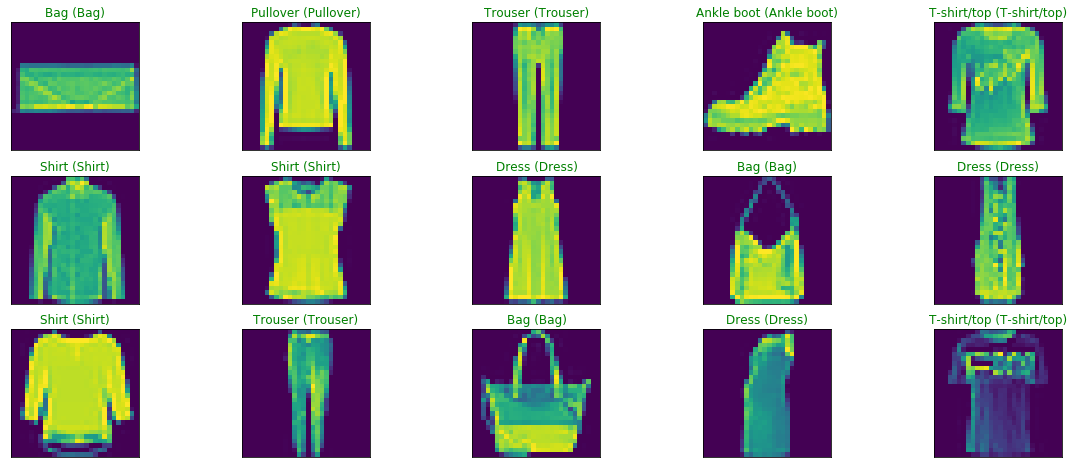

In [18]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(xTest.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(xTest[index]))
    predict_index = np.argmax(yhat[index])
    true_index = np.argmax(yhat[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [54]:
'''
2. Extract the weights from the model after training it. See model.summary() and model.trainable variables,
where model is the TensorFlow model you trained.
'''
for layer in range(len(model_p2.layers)):
    print("layer", [layer], "weights", model_p2.layers[layer].weights)
    # model_p2.layers[layer].weights
    
# print("layer 1 weights", model_p2.layers[0].weights)
# print("layer 2 weights", model_p2.layers[1].weights)
# print("layer 3 weights", model_p2.layers[2].weights)



layer [0] weights [<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
array([[[[-1.04539253e-01,  2.70383537e-01, -5.85448742e-01,
           1.27387978e-03,  1.48736566e-01,  9.87166017e-02,
           2.23625019e-01,  1.60570256e-02, -6.83005452e-02,
          -1.17079116e-01, -1.27366766e-01, -6.93736494e-01,
           2.85533797e-02,  7.56675079e-02,  1.41028449e-01,
          -6.45112991e-02,  7.25964233e-02, -1.50383025e-01,
          -2.41791382e-01,  1.07670926e-01,  1.00644134e-01,
          -2.26527303e-01, -2.18907714e-01,  1.47401914e-01,
          -8.88943970e-02,  2.32141867e-01,  3.34302373e-02,
          -4.50114384e-02,  7.97282606e-02, -6.48149699e-02,
           2.69812614e-01, -1.89837888e-02, -4.16925430e-01,
           1.42986387e-01, -1.40786558e-01,  4.78445925e-02,
          -1.88920572e-01, -1.79903314e-01,  9.55820456e-03,
          -7.44555816e-02, -9.50874388e-02, -1.75591633e-01,
          -2.18720898e-01, -8.32436308e-02,  2.42846

In [55]:
def extract_w_b(model):
    # Extract W1, b1, W2, b2, W3, b3 from model.

    img_sz = 28
    filter_sz = 3
    channels = 64
    W1 = np.zeros((channels*(img_sz-2)*(img_sz-2), img_sz*img_sz))
    b1 = np.zeros((channels*(img_sz-2)*(img_sz-2)))
    start = 0
    convolution_weights = np.array(model_p2.get_weights()[0]) # 3x3x1x64
    convolution_bias = np.array(model.get_weights()[1]) # 64x1
    for rows in range(img_sz-2):
        for column in range(img_sz-2):
            for filter in range(channels):
                for depth in range(filter_sz):
                    start_ind = (rows + depth)*img_sz + column
                    stop_ind = start_ind + filter_sz
                    W1[start, start_ind:stop_ind] = convolution_weights[depth,:,0,filter]
                    b1[start] = convolution_bias[filter]
                start = start + 1

    b1 = np.atleast_2d(b1).T
    W2 = model.get_weights()[2].T
    b2 = np.atleast_2d(model.get_weights()[3]).T
    W3 = model.get_weights()[4].T
    b3 = np.atleast_2d(model.get_weights()[5]).T
    
    return W1, b1, W2, b2, W3, b3
    


In [56]:
extract_w_b(model_p2)

(array([[-0.10453925,  0.07981372,  0.09846689, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.27038354, -0.30312526, -0.22981493, ...,  0.        ,
          0.        ,  0.        ],
        [-0.58544874,  0.22128601,  0.33260095, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.00303328,
          0.04103238, -0.02020406],
        [ 0.        ,  0.        ,  0.        , ..., -0.12233867,
         -0.3150976 ,  0.2800343 ],
        [ 0.        ,  0.        ,  0.        , ..., -0.05194169,
         -0.04391593,  0.18400499]]),
 array([[-0.00628439],
        [-0.01333905],
        [-0.00578913],
        ...,
        [-0.08418756],
        [-0.02204933],
        [-0.14528911]]),
 array([[ 0.02578864,  0.00861565, -0.01033283, ..., -0.00720536,
          0.02052257,  0.01672242],
        [ 0.0799867 ,  0.02913255, -0.08180863, ...,  0.01344714,
         -0.12647843,  0.04657477],
        [ 0.0159

In [57]:
def fully_connected(W, b, x):
    h = np.dot(W,x)+b
    return h

In [58]:
def max_pooling(x, poolingWidth):
    M, N, P = x.shape
  
    K = poolingWidth[0]
    L = poolingWidth[1]

    MK = M // K
    NL = N // L
    return (x[:MK*K, :NL*L, ...].reshape((MK, K, NL, L) + x.shape[2:]).max(axis=(1, 3)))

In [59]:
def softmax(x):
    num = np.exp(x - np.max(x))
    deno = np.sum(num)
    y_hat = (num/(deno))
    return y_hat


In [60]:
def relu(x):
    return np.maximum(x,0)

In [61]:
def accuracy(y,y_hat):
    #print("this is y",y.shape)
    #print("this is yhat", yhat.shape)
    y = np.atleast_2d(np.argmax(y,axis=0)).T
    y_hat = np.atleast_2d(np.argmax(y_hat,axis=0)).T
    accu = 100*np.sum(np.equal(y,y_hat))/y.shape[0]
    return accu

In [63]:
W1, b1, W2, b2, W3, b3 = extract_w_b(model_p2)
dim = np.reshape(xTest[998],(-1,1))
h1 = fully_connected(W1, b1, dim)
#print("H1 :", h1.shape)
h10 = h1.reshape(26,26,64)
h11 = max_pooling(h10, poolingWidth=(2,2))
#print("After MaxPooling :", h11.shape)
h12 = relu(h11)
#print("1st ReLU:", h12.shape)
h13 = np.atleast_2d(h12.flatten()).T
#print("After Flattening :", h13.shape)
h2 = fully_connected(W2, b2, h13)
#print("Dense_1 :", h2.shape)
h21 = relu(h2)
#print("2nd ReLU :", h21.shape)
h3 = fully_connected (W3, b3, h21)
#print("Dense_2 :", h3.shape)


In [64]:
# Working on the same test data xTest[998]

yhat = softmax(h3)
#print(yhat.Shape) 
yhat2 = yhat
yhat2 = yhat.reshape(-1)
print(yhat2)

[3.33100924e-12 1.92351659e-19 5.06393396e-14 1.63713661e-14
 7.14242818e-15 1.68091697e-11 1.68456940e-13 1.00000000e+00
 1.40494739e-12 9.42827208e-15]


In [66]:
print("This is from Tensorflow Model",yhat1)
print("This is from Numpy Model", yhat2)

print("This value shows similarity between two layers",accuracy(yhat2,yhat1))

This is from Tensorflow Model [3.3310093e-12 1.9235139e-19 5.0639418e-14 1.6371341e-14 7.1424300e-15
 1.6809189e-11 1.6845696e-13 1.0000000e+00 1.4049499e-12 9.4282771e-15]
This is from Numpy Model [3.33100924e-12 1.92351659e-19 5.06393396e-14 1.63713661e-14
 7.14242818e-15 1.68091697e-11 1.68456940e-13 1.00000000e+00
 1.40494739e-12 9.42827208e-15]
This value shows similarity between two layers 100.0


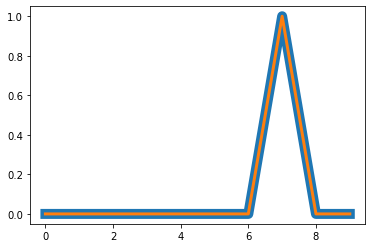

In [68]:
plt.plot(yhat1, linewidth=10)
plt.plot(yhat2, linewidth=3)
plt.show()